EVALUACIÓN DE PREDICCIONES: Confusion Matrix using Python Sklearn

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()

In [ ]:
iris.feature_names


In [ ]:
iris.target_names

In [ ]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

In [ ]:
df.shape

In [ ]:
df['target']=iris.target
df.head()

In [ ]:
df['flowername']=df.target.apply(lambda x: iris.target_names[x])
df.head()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df.drop(['target','flowername'],axis='columns')
y= df.target

In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=3)

In [ ]:
X_train.shape


In [ ]:
y_train.shape

# Create K Nearest Neighbor Classification (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


In [ ]:
knn.score(X_test,y_test)

# ConFusion Matrix

In [16]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred=knn.predict(X_test)
matrix= confusion_matrix(y_test, y_pred)#confusion_matrix(truth, prediction)

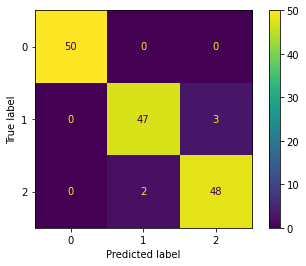

In [21]:
ConfusionMatrixDisplay.from_estimator(knn, X, y)
plt.show()


## Classification report

In [22]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))   # Metricas para cada Clase, AVERAGE al final 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

